## Exploratory Data Analysis (EDA)

In [1]:
# read the document term matrix

import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,ali,anthony,bert,bill,dave,hasan,jim,joe,john,louis,mike,nikki,ricky,russell
aaaaah,0,0,0,1,0,0,0,0,0,0,0,0,0,0
aaaah,0,0,0,0,1,0,0,0,0,0,0,0,0,0
aah,0,0,0,0,2,0,0,0,0,3,0,0,0,1
aand,0,0,0,0,2,0,0,0,0,0,0,0,0,0
abandon,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [2]:
#Find the top 30 words

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
top_dict    

{'ali': [('like', 126),
  ('know', 68),
  ('just', 64),
  ('don', 61),
  ('shit', 34),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('oh', 21),
  ('wanna', 21),
  ('husband', 20),
  ('got', 19),
  ('time', 19),
  ('right', 19),
  ('women', 19),
  ('cause', 18),
  ('day', 17),
  ('people', 16),
  ('pregnant', 15),
  ('god', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13),
  ('dude', 12),
  ('really', 12),
  ('work', 12),
  ('look', 11),
  ('fuck', 11),
  ('uh', 11)],
 'anthony': [('like', 50),
  ('know', 39),
  ('don', 38),
  ('joke', 35),
  ('got', 34),
  ('said', 31),
  ('ve', 28),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('people', 23),
  ('guys', 22),
  ('tell', 19),
  ('grandma', 19),
  ('right', 18),
  ('thing', 18),
  ('think', 18),
  ('yeah', 17),
  ('time', 17),
  ('good', 16),
  ('dad', 16),
  ('did', 16),
  ('school', 16),
  ('baby', 16),
  ('jokes', 15),
  ('gonna', 15),
  ('okay', 15),
  ('family', 14),
  ('shark', 14)],
 'b

In [3]:
#Print the top 15 words said by each cmoedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('------')

ali
like, know, just, don, shit, gonna, ok, lot, gotta, oh, wanna, husband, got, time
------
anthony
like, know, don, joke, got, said, ve, anthony, day, say, just, people, guys, tell
------
bert
like, goes, know, just, dad, got, don, right, yeah, ll, wife, ila, did, gonna
------
bill
like, just, right, know, don, gonna, got, fucking, yeah, shit, dude, think, want, ll
------
dave
like, know, don, just, said, shit, got, say, nigga, right, fuck, uh, gonna, white
------
hasan
like, know, don, dad, just, going, want, got, love, ve, hasan, right, say, time
------
jim
like, don, right, fucking, went, just, know, ve, people, day, oh, going, think, fuck
------
joe
like, people, just, don, fucking, fuck, gonna, know, think, shit, got, man, right, house
------
john
like, don, said, just, people, know, going, guy, say, horse, wife, years, did, okay
------
louis
like, just, know, don, people, life, thing, gonna, cause, shit, time, good, tit, right
------
mike
like, know, said, just, don, think, say

In [4]:
# Add the top words to the stop word list
from collections import Counter

# Pull out top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words

['like',
 'know',
 'just',
 'don',
 'shit',
 'gonna',
 'ok',
 'lot',
 'gotta',
 'oh',
 'wanna',
 'husband',
 'got',
 'time',
 'right',
 'women',
 'cause',
 'day',
 'people',
 'pregnant',
 'god',
 'need',
 'yeah',
 'tell',
 'dude',
 'really',
 'work',
 'look',
 'fuck',
 'uh',
 'like',
 'know',
 'don',
 'joke',
 'got',
 'said',
 've',
 'anthony',
 'day',
 'say',
 'just',
 'people',
 'guys',
 'tell',
 'grandma',
 'right',
 'thing',
 'think',
 'yeah',
 'time',
 'good',
 'dad',
 'did',
 'school',
 'baby',
 'jokes',
 'gonna',
 'okay',
 'family',
 'shark',
 'like',
 'goes',
 'know',
 'just',
 'dad',
 'got',
 'don',
 'right',
 'yeah',
 'll',
 'wife',
 'ila',
 'did',
 'gonna',
 'georgia',
 'want',
 'gun',
 'think',
 'day',
 'oh',
 'hey',
 'fucking',
 'shit',
 'going',
 'getting',
 'fuck',
 'guns',
 've',
 'man',
 'tell',
 'like',
 'just',
 'right',
 'know',
 'don',
 'gonna',
 'got',
 'fucking',
 'yeah',
 'shit',
 'dude',
 'think',
 'want',
 'll',
 'fuck',
 'guy',
 'let',
 'people',
 'did',
 'di

In [5]:
Counter(words).most_common()

[('like', 14),
 ('know', 14),
 ('just', 14),
 ('don', 14),
 ('right', 14),
 ('got', 12),
 ('people', 12),
 ('going', 11),
 ('gonna', 9),
 ('oh', 9),
 ('time', 9),
 ('say', 9),
 ('think', 9),
 ('ll', 9),
 ('shit', 8),
 ('ve', 8),
 ('did', 8),
 ('want', 8),
 ('yeah', 7),
 ('fuck', 7),
 ('guy', 7),
 ('cause', 6),
 ('day', 6),
 ('said', 6),
 ('thing', 6),
 ('good', 6),
 ('didn', 6),
 ('really', 5),
 ('okay', 5),
 ('fucking', 5),
 ('tell', 4),
 ('look', 4),
 ('dad', 4),
 ('goes', 4),
 ('come', 4),
 ('mean', 4),
 ('life', 4),
 ('gotta', 3),
 ('women', 3),
 ('god', 3),
 ('dude', 3),
 ('uh', 3),
 ('guys', 3),
 ('school', 3),
 ('hey', 3),
 ('man', 3),
 ('let', 3),
 ('make', 3),
 ('everybody', 3),
 ('old', 3),
 ('white', 3),
 ('way', 3),
 ('girl', 3),
 ('years', 3),
 ('ok', 2),
 ('joke', 2),
 ('baby', 2),
 ('wife', 2),
 ('guns', 2),
 ('little', 2),
 ('love', 2),
 ('went', 2),
 ('kids', 2),
 ('feel', 2),
 ('lot', 1),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('need', 1),
 ('work', 1),
 (

In [6]:
# Add the most common words used by all the comedians to the stop word list 
# This will help to idendify the unique characteristic of a comedian

add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['like',
 'know',
 'just',
 'don',
 'right',
 'got',
 'people',
 'going',
 'gonna',
 'oh',
 'time',
 'say',
 'think',
 'll',
 'shit',
 've',
 'did',
 'want',
 'yeah',
 'fuck',
 'guy']

In [7]:
# Time to update the document term matrix with the new list of stop words

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read the clean data pickled from previous worksheet
data_clean = pd.read_pickle('data_clean.pkl')

#Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate the document term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_stop.index = data_clean.index

#Pickle it
import pickle
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

In [8]:
# word cloud time
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150, random_state=42)

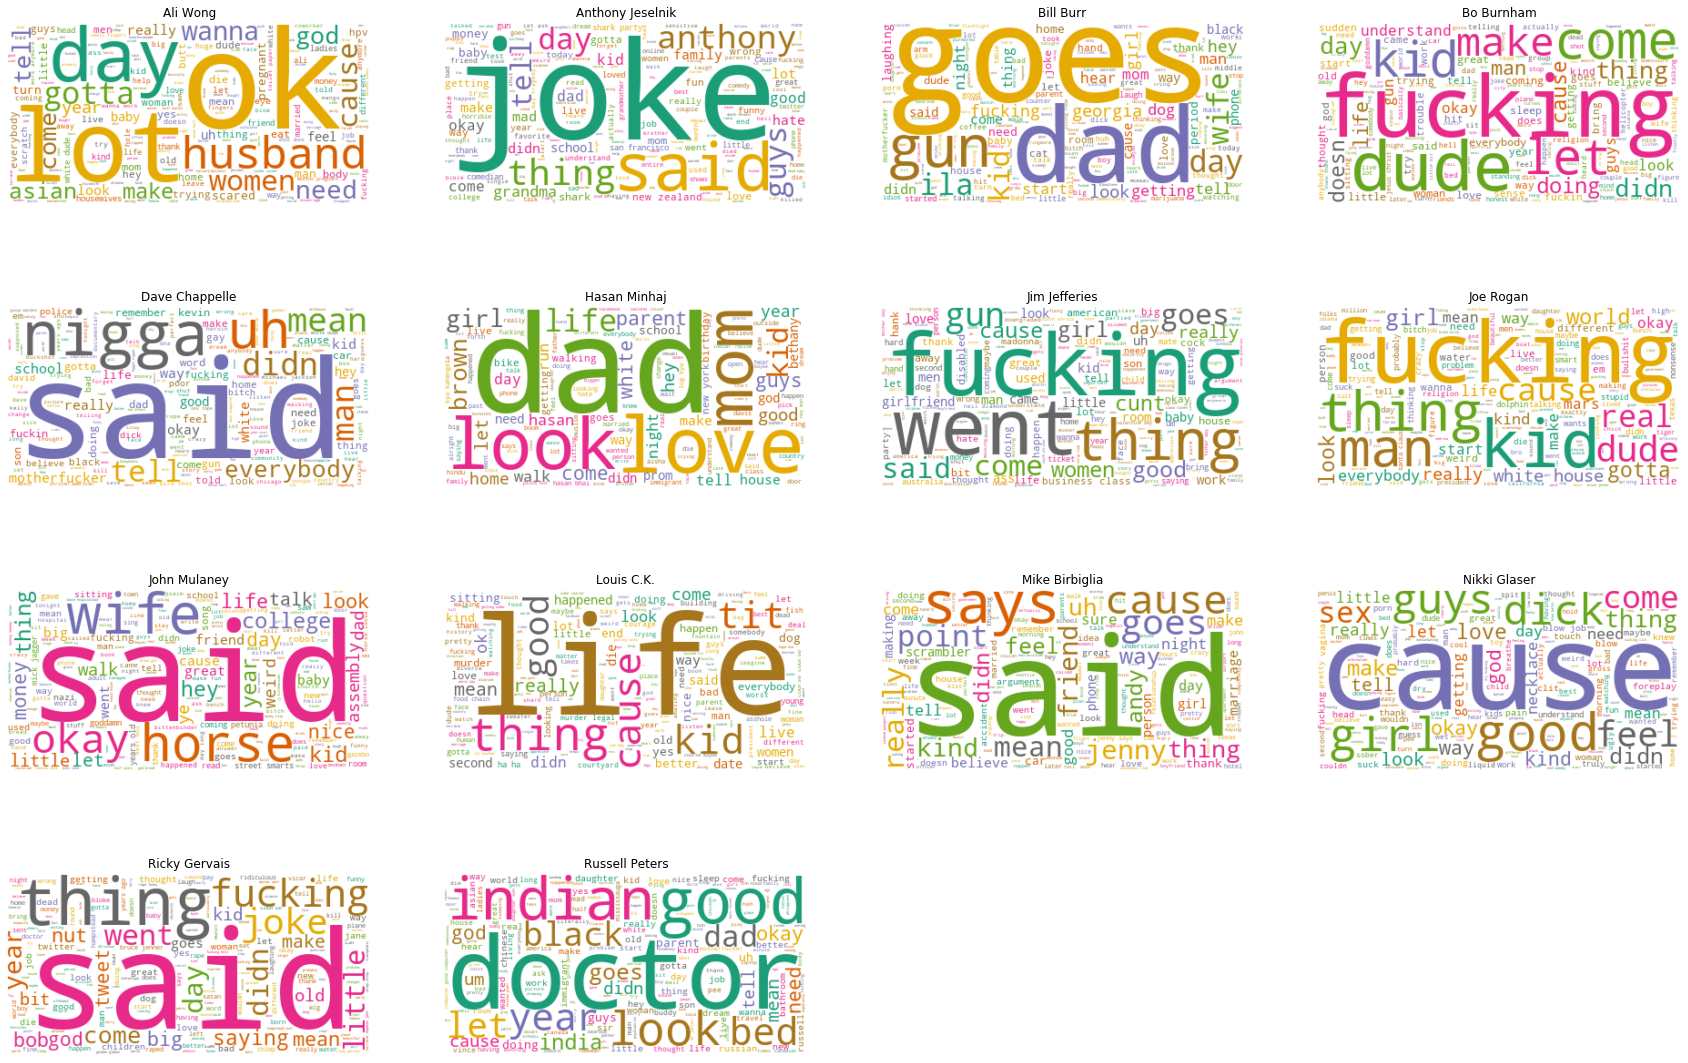

<Figure size 2160x1440 with 0 Axes>

In [9]:
# Plot it
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 20]
full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Nikki Glaser',
              'Ricky Gervais', 'Russell Peters']

#Create a plot for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])

plt.show()
plt.savefig('wordcloud.png')